In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

{'Vàng miếng SJC 999.9': [6890, 6965], 'Nhẫn Trơn PNJ 999.9': [5600, 5690], 'Vàng Kim Bảo 999.9': [5600, 5690], 'Vàng Phúc Lộc Tài 999.9': [5600, 5700], 'Vàng nữ trang 999.9': [5590, 5670], 'Vàng nữ trang 999': [5584, 5664], 'Vàng nữ trang 99': [5523, 5623], 'Vàng 750 (18K)': [4128, 4268], 'Vàng 585 (14K)': [3192, 3332], 'Vàng 416 (10K)': [2234, 2374], 'Vàng miếng PNJ (999.9)': [5600, 5700], 'Vàng 916 (22K)': [5154, 5204], 'Vàng 650 (15.6K)': [3561, 3701], 'Vàng 680 (16.3K)': [3731, 3871], 'Vàng 610 (14.6K)': [3334, 3474], 'Vàng 375 (9K)': [2001, 2141], 'Vàng 333 (8K)': [1746, 1886]}


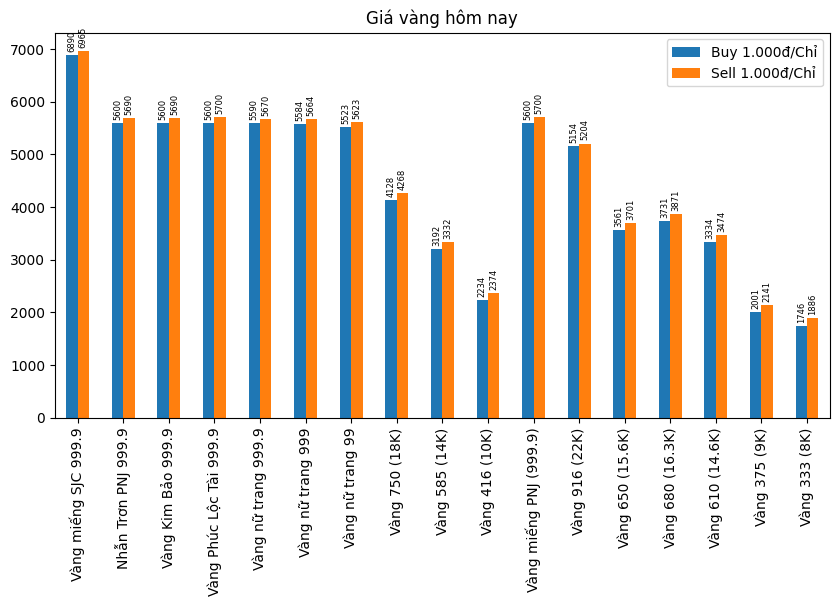

In [64]:
# Get the HTML content of the website
url = "https://www.pnj.com.vn/blog/gia-vang/"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")
# Find the table element by its class name
table = soup.find_all("tr")
table = table[1:]
prices = []
for i in range(len(table)):
    values = table[i].find_all("td")
    price = []
    for value in values:
        if value.text.strip()[0].isnumeric():
            number = int(value.text.strip().replace(",",""))
            price.append(number)
            
        else:
            price.append(value.text.strip())
    prices.append(price)
# print(table)
tbl = {}
for price in prices:
    tbl[price[0]] = price[1:]
print(tbl)
newdf = pd.DataFrame.from_dict(tbl, orient='index', columns=['Buy 1.000đ/Chỉ', 'Sell 1.000đ/Chỉ'])
labels = [i for i in tbl.keys()]
ax = newdf.plot(kind='bar', figsize=(10, 5), legend=True)
plt.legend(loc='upper right')
plt.title('Giá vàng hôm nay')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), # type: ignore
                ha='center', va='center', fontsize=6, color='black', xytext=(0, 10), rotation=90,
                textcoords='offset points')

plt.show()

In [41]:
# Get the HTML content of the website
url = "https://goldpricez.com/gold/history/vnd/year-1"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")
# Find the table element by its class name
table = soup.find_all("tr")
table = table[6:]

<Axes: xlabel='Date'>

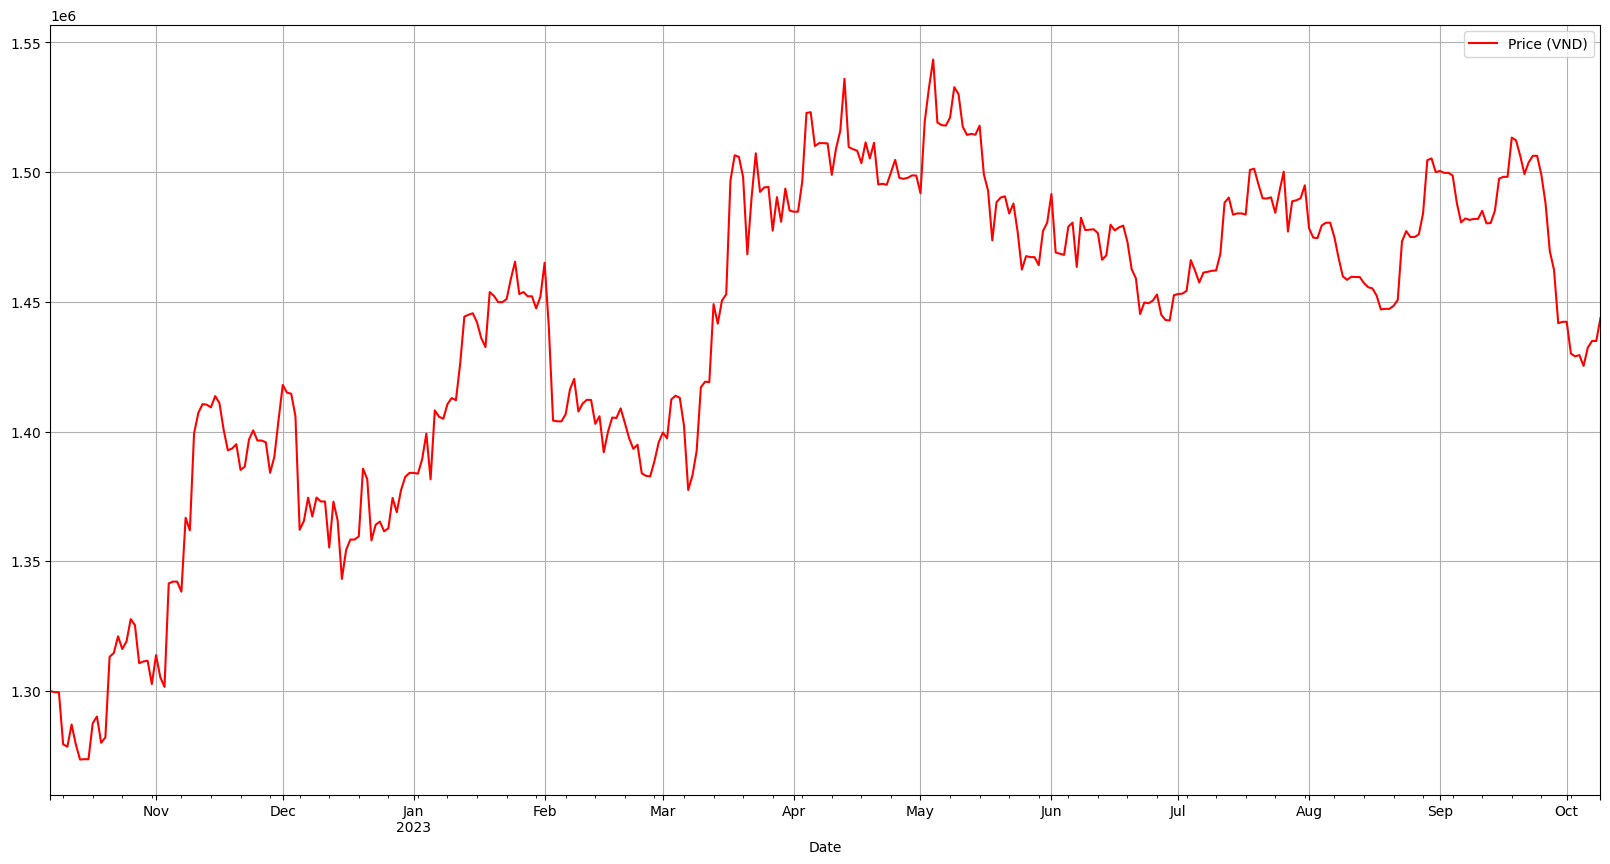

In [43]:
date = []
price = []
for row in table:
    row = row.find_all("td")
    if len(row) == 0:
        continue
    date.append(row[0].text.strip())
    price.append(row[1].text.strip())

date[0] = '09-Oct-2023'
for i in range(len(date)):
    date[i] = dt.datetime.strptime(date[i], '%d-%b-%Y')
# print(date)
for i in range(len(price)):
    price[i] = price[i].replace("VND", "")
    price[i] = float(price[i].strip())
# print(price)
df = pd.DataFrame({'Date': date, 'Price (VND)': price})
df.plot(kind='line', x='Date', y='Price (VND)', figsize=(20, 10), legend=True, color='red', grid=True)


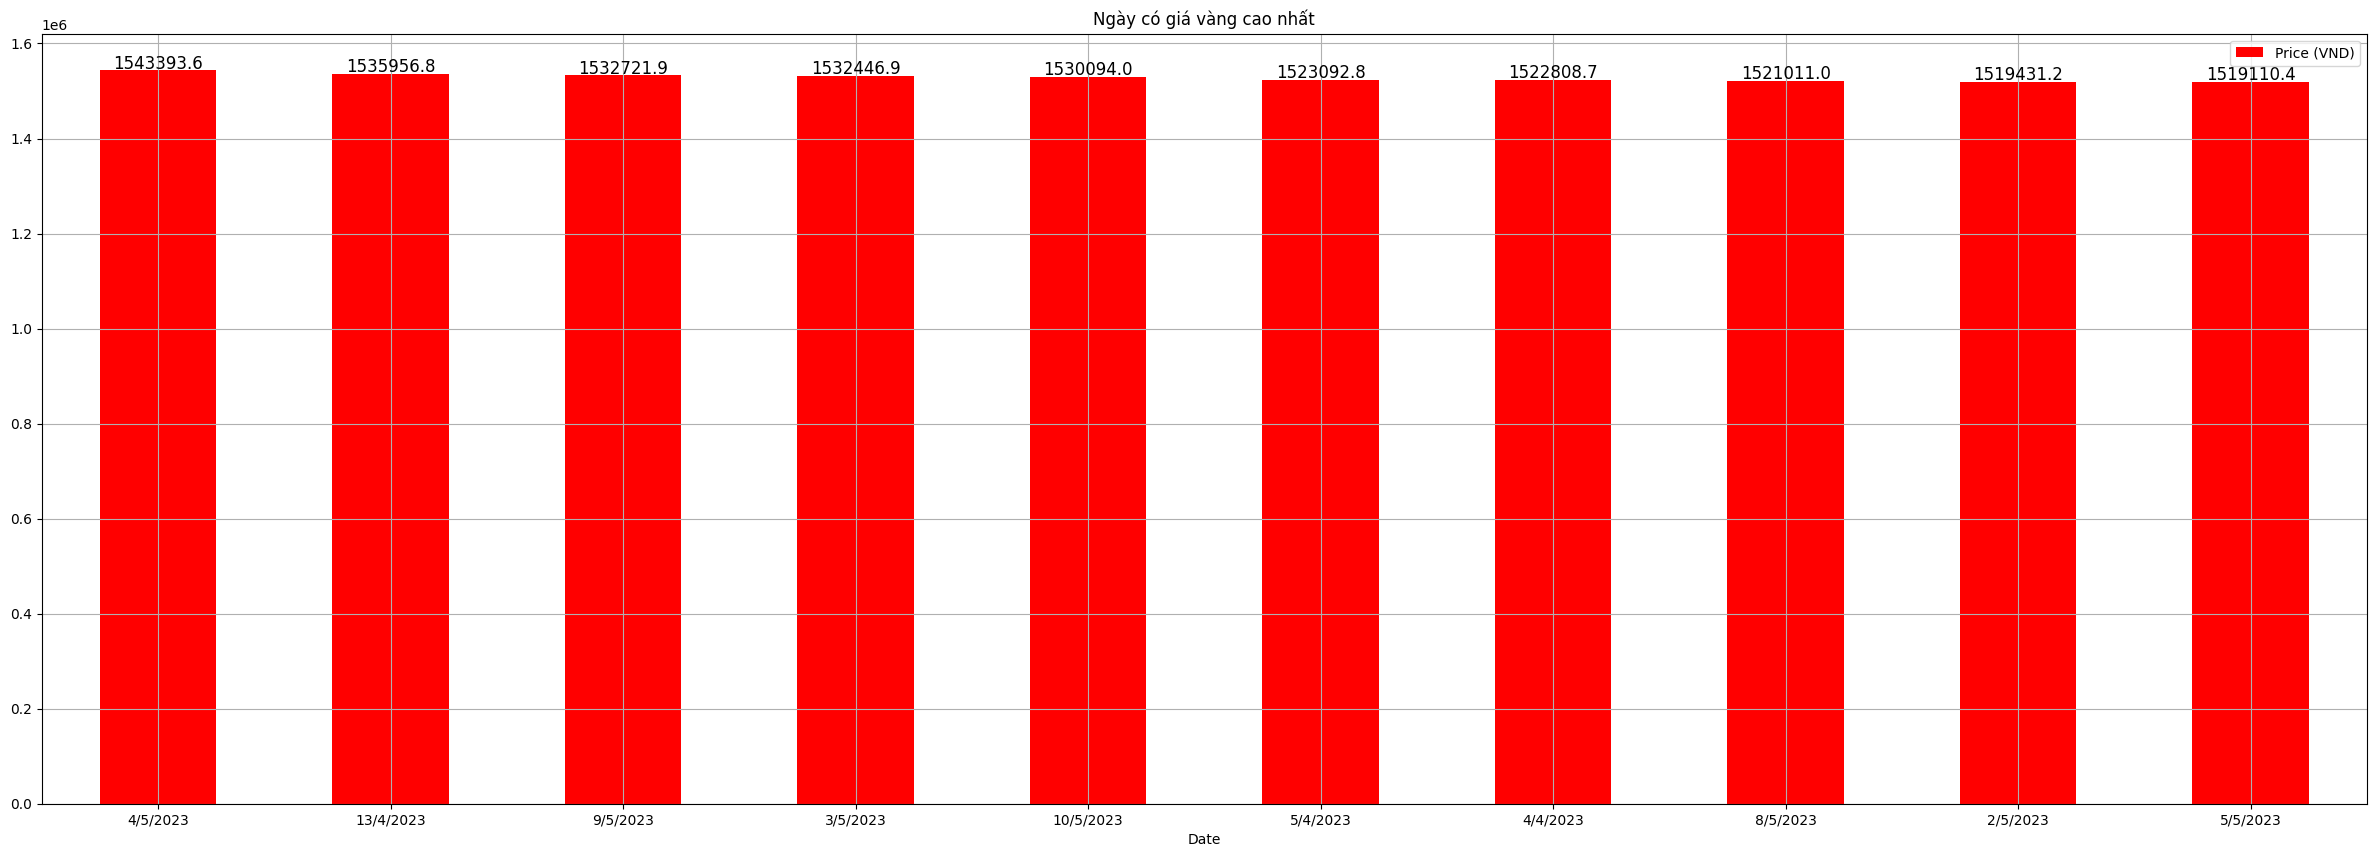

In [55]:
top10Date = []
top10Price = []
for i  in df['Price (VND)'].sort_values(ascending=False).head(10).index:
    top10Date.append(f"{df['Date'][i].day}/{df['Date'][i].month}/{df['Date'][i].year}")
    # print(f"Ngày {df['Date'][i].day}, Tháng {df['Date'][i].month}, Năm {df['Date'][i].year}")
    top10Price.append(df['Price (VND)'][i])

ax = pd.DataFrame({'Date': top10Date,'Price (VND)': top10Price}).plot(kind='bar',title='Ngày có giá vàng cao nhất', x='Date', y='Price (VND)', rot= 0, figsize=(30, 10), legend=True, color='red', grid=True)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), # type: ignore
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
